# **Demystifying Machine Learning Tutorial**
This notebook consists of various models for understanding ML better.


Setup

In [ ]:
!git clone https://github.com/mtutorial199/mltutorial

fatal: destination path 'mltutorial' already exists and is not an empty directory.


# Data is Important

This mini excercise will help you understand how data plays an imporatnt role in Machine Learning Systems.

**The Task** : Predicting a student's test score based on the number of hours they studied using linear regression."

**Step 1: Collect the data**

Collect data on students' study hours and their corresponding test scores.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data: hours studied and test scores
hours_studied = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
test_scores = np.array([50, 60, 65, 70, 90])


**Step 2: Initialization of the Machine Learning (ML) model/algorithm**

Here we Initialize a basic ML regression model. In python, using libraries like sklearn you can choose a basic ml model(Hre we choose* LinearRegression()*) and initilize or "train" your model in just one lne as shown below

In [ ]:
model = LinearRegression()
model.fit(hours_studied, test_scores)

LinearRegression()

**Step 3 : Using the trained Model**

Now you can use this trained model based off your trainign data to predict test score value given number of hours studied.

In [ ]:
testScore = model.predict(np.array([0.5]).reshape(-1, 1))
print(testScore)

[44.5]


Below you can see visually where does the model/regression line looks like in respect of data

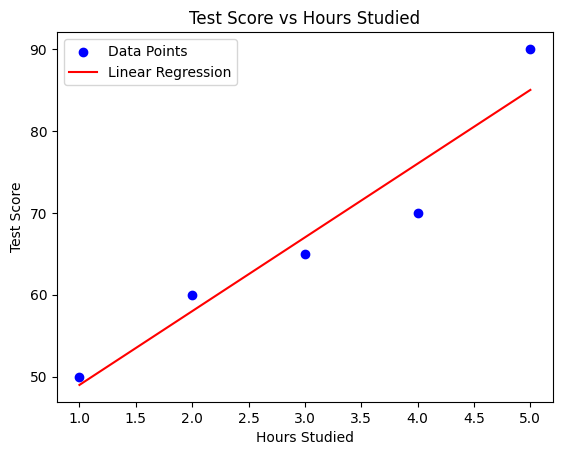

In [ ]:
plt.scatter(hours_studied, test_scores, color='blue', label="Data Points")
plt.plot(hours_studied, model.predict(hours_studied), color='red', label="Linear Regression")
plt.xlabel("Hours Studied")
plt.ylabel("Test Score")
plt.title("Test Score vs Hours Studied")
plt.legend()
plt.show()


**Step 5 : Change the training Data**

 Now let's change the trainign data slightly by adding more data points.

In [ ]:
hours_studied_new = np.array([1, 2, 3, 4, 5, 1, 1.5, 2]).reshape(-1, 1)
test_scores_new = np.array([50, 60, 65, 70, 90, 85, 87, 86])

**Step 6: Retrain the model with new added data points**

Retrain the model with new added data points. As you can see the regression line and hence the model have changed.

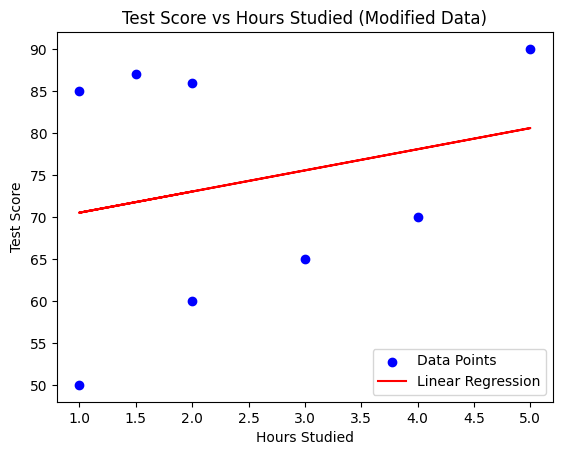

In [ ]:
model.fit(hours_studied_new, test_scores_new)

plt.scatter(hours_studied_new, test_scores_new, color='blue', label="Data Points")
plt.plot(hours_studied_new, model.predict(hours_studied_new), color='red', label="Linear Regression")
plt.xlabel("Hours Studied")
plt.ylabel("Test Score")
plt.title("Test Score vs Hours Studied (Modified Data)")
plt.legend()
plt.show()

**Step 7: The test score changed!! Now I can study less to get more score!!**

You can see here that passing the same input now produces different tests score.

In [ ]:
testScore = model.predict(np.array([0.5]).reshape(-1, 1))
print(testScore)

[69.2462845]


You can repeat the above by passing different trainign data and see the difference in regression line.

# ML Models Deep Dive



## **Binary Classification**
We will perform Binary Classification. It is a supervised learning algorithm that categorizes new observations into one of two classes.

## Classifier **[SVM Classifier](https://scikit-learn.org/stable/modules/svm.html)**
Apply basic ML model such as SVM Classifier

### Data Preprocessing
*   Reading the Dataset
*   Analysing the Dataset
*   Cleaning the Dataset

**Reading the Dataset**

We are going to use the IMDB Reviews dataset which has columns such as Review/Label. Label could be 0/1 which stands for negative or positive review.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import tensorflow_datasets as tfds
import pandas as pd

# Load the IMDB movie reviews dataset from TensorFlow Datasets
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
print(dataset)
# Convert the training dataset into a Pandas DataFrame
train_df = pd.DataFrame(columns=['Review', 'Label'])
for review, label in tfds.as_numpy(dataset['train']):
    train_df = pd.concat([train_df, pd.DataFrame({'Review': [review.decode('utf-8')], 'Label': [label]})])
print(train_df.head(5))

# Print the number of records in the training DataFrame
num_train_records = len(train_df)
print(f"Number of records in the training DataFrame: {num_train_records}")

# Convert the test dataset into a Pandas DataFrame directly from the original dataset
test_df = pd.DataFrame(columns=['Review', 'Label'])

for review, label in tfds.as_numpy(dataset['test']):
    test_df = pd.concat([test_df, pd.DataFrame({'Review': [review.decode('utf-8')], 'Label': [label]})])

# Print the number of records in the test DataFrame
num_test_records = len(test_df)
print(f"Number of records in the test DataFrame: {num_test_records}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete9S8ARL/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete9S8ARL/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete9S8ARL/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
{Split('train'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, Split('test'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, Split('unsupervised'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}
                                              Review Label
0  This was an absolutely terrible movie. Don't b...     0
0  I have been known to fall asleep during films,...     0
0  Mann photographs the Alberta Rocky Mountains i...     0
0  This is the kind of film for a snowy Sunday af...     1
0  As others have mentioned, all the women that g...     1
Number of records in the training DataFrame: 250

**Analyzing the Dataset**

We are going to analyze the IMDB Reviews dataset and check for the data imbalance and rectify it incase it exists.

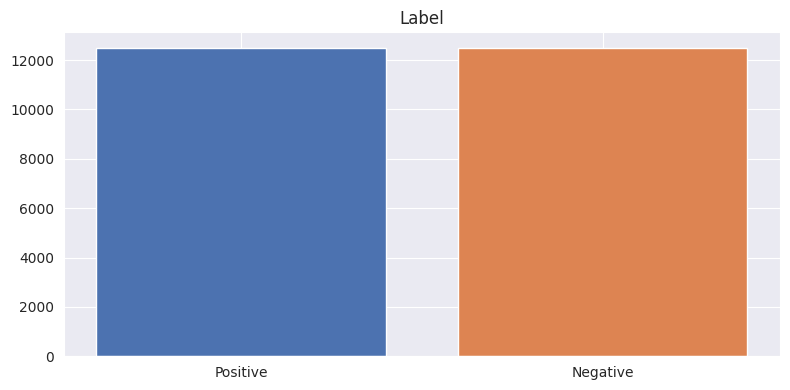

In [ ]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=train_df.value_counts(['Label']),
        color=colors[:2])
plt.title('Label')
plt.savefig('Label.png')
plt.show()


This dataset contains 2500 rows; however, to train our model faster in the following steps, we’re going to take a smaller sample of 1000 rows. This small sample will contain equal number of positive and negative reviews to make the data imbalanced (so I can teach you undersampling and oversampling techniques in the next step)



In [ ]:
# Create balanced subsets with 500 positive and 500 negative samples from both train and test
positive_train = train_df[train_df['Label'] == 1]
negative_train = train_df[train_df['Label'] == 0]

positive_test = test_df[test_df['Label'] == 1]
negative_test = test_df[test_df['Label'] == 0]

sampled_train_df = pd.concat([positive_train.sample(n=5000, random_state=42), negative_train.sample(n=5000, random_state=42)])
sampled_test_df = pd.concat([positive_test.sample(n=5000, random_state=42), negative_test.sample(n=5000, random_state=42)])

# Randomly shuffle the sampled DataFrames
sampled_train_df = sampled_train_df.sample(frac=1, random_state=42)
sampled_test_df = sampled_test_df.sample(frac=1, random_state=42)

# Print the number of records in the sampled DataFrames
num_sampled_train_records = len(sampled_train_df)
num_sampled_test_records = len(sampled_test_df)

print(f"Number of randomly sampled records from the training DataFrame: {num_sampled_train_records}")
print(f"Number of randomly sampled records from the test DataFrame: {num_sampled_test_records}")

Number of randomly sampled records from the training DataFrame: 10000
Number of randomly sampled records from the test DataFrame: 10000


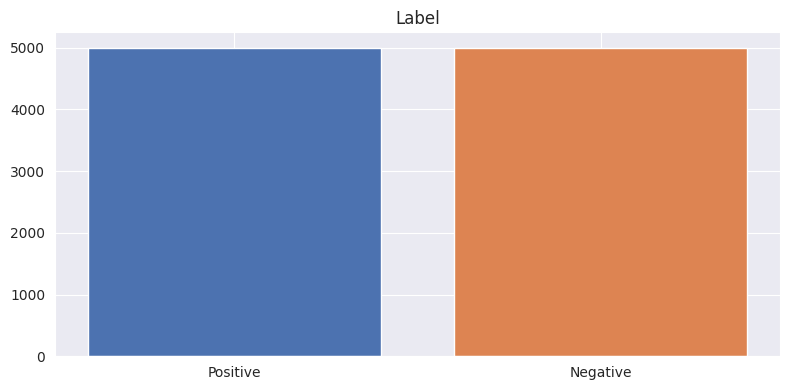

In [ ]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=sampled_train_df.value_counts(['Label']),
        color=colors[:2])
plt.title('Label')
plt.savefig('Label.png')
plt.show()

In [ ]:
# Convert labels to binary (positive=1, negative=0) integers
sampled_train_df['Label'] = sampled_train_df['Label'].astype(int)
sampled_test_df['Label'] = sampled_test_df['Label'].astype(int)



[***TFIDF Vectorizer***](https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a) Machine learning models don't understand text so we need to convert them to numbers

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Use TF-IDF vectorization to convert text to numerical features
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(sampled_train_df['Review'])
X_test = vectorizer.transform(sampled_test_df['Review'])

### Training the SVM Classifier model

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define and train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, sampled_train_df['Label'])

# Predict labels for the test data
predictions = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(sampled_test_df['Label'], predictions)
classification_rep = classification_report(sampled_test_df['Label'], predictions, target_names=['Negative', 'Positive'])

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

    Negative       0.87      0.86      0.86      5000
    Positive       0.86      0.87      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
# Create a dictionary with your data
data = {
    'Review': ["Such a wonderful film"],
    'Label': [1]  # Adjust the label as needed (1 for positive, 0 for negative, for example)
}

# Create the DataFrame
df = pd.DataFrame(data)

# Preprocess the text in the DataFrame using the TF-IDF vectorizer
X_eval = vectorizer.transform(df['Review'])

# Predict labels for the single record
eval_predictions = svm_classifier.predict(X_eval)
print(eval_predictions)
data = {
    'Review': ["Such a shitty film"],
    'Label': [1]  # Adjust the label as needed (1 for positive, 0 for negative, for example)
}

# Create the DataFrame
df = pd.DataFrame(data)

# Preprocess the text in the DataFrame using the TF-IDF vectorizer
X_eval = vectorizer.transform(df['Review'])

# Predict labels for the single record
eval_predictions = svm_classifier.predict(X_eval)
print(eval_predictions)

[1]
[0]


In [ ]:
data = {
    'Review': ["Such a shitty film"],
}

# Create the DataFrame
df = pd.DataFrame(data)

# Preprocess the text in the DataFrame using the TF-IDF vectorizer
X_eval = vectorizer.transform(df['Review'])

# Predict labels for the single record
eval_predictions = svm_classifier.predict(X_eval)
print(eval_predictions)

[0]


## **[Basic Neural Network](https://en.wikipedia.org/wiki/Neural_network)**

Apply advanced algorithms like Neural Networks for predicting the labels as  'Positive', 'Negative', 'Neutral', or 'Mixed'. This is called  multiclass Classification which is a supervised learning algorithm that categorizes new observations into one of many classes.


### Analysing the Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
df = pd.read_csv("mltutorial/train.txt", delimiter=';',names=['text','label'])
df.head
print("Shape of the DataFrame:", df.shape)
df.sample(5)


Shape of the DataFrame: (16000, 2)


,text,label
6529,i have a feeling im going to get an unpleasant...,sadness
11424,i felt such guilt for being sad for having ang...,joy
11003,i can feel the awkwardness and that weird kind...,fear
12692,i was starting to feel resentful towards ah ki...,anger
818,i was feeling pretty cranky this morning and s...,anger


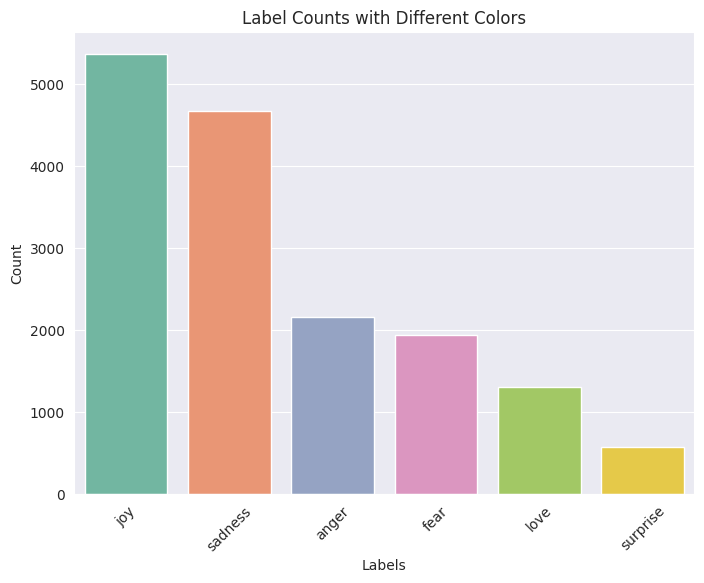

In [ ]:
# Count the occurrences of each label
label_counts = df['label'].value_counts()

# Define a color palette for labels
colors = sns.color_palette('Set2', len(label_counts))

# Plot the counts with different colors
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette=colors)
plt.title('Label Counts with Different Colors')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Training the neural network model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from sklearn.metrics import accuracy_score, classification_report
import scipy.sparse as sp
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

df = pd.read_csv("mltutorial/train.txt", delimiter=';',names=['text','label'])
df_val = pd.read_csv("mltutorial/val.txt", delimiter=';',names=['text','label'])
df.head
print("Shape of the DataFrame:", df.shape)
df.sample(5)

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Encode string labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert text data into numerical format using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Convert sparse matrices to NumPy arrays
X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

# Split the data into training and validation sets using NumPy
validation_split = 0.2
split_index = int((1 - validation_split) * len(X_train_tfidf))

X_train_final = X_train_tfidf[:split_index]
X_val = X_train_tfidf[split_index:]
y_train_final = y_train_encoded[:split_index]
y_val = y_train_encoded[split_index:]



Shape of the DataFrame: (16000, 2)


### Build And Compile the Model


In [ ]:
# Build a simple neural network model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=32, input_length=X_train_tfidf.shape[1]))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


### Train and Evaluate the Model


In [ ]:
# Train the model
batch_size = 64
epochs = 5
model.fit(X_train_final, y_train_final, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))
model.save('neural_network.h5')

# Evaluate the model on the test data
y_pred_probs = model.predict(X_test_tfidf)
y_pred_encoded = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
classification_rep = classification_report(y_test_encoded, y_pred_encoded, target_names=label_encoder.classes_)

# Print evaluation results
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(classification_rep)

Epoch 1/5
160/160 [==============================] - 90s 559ms/step - loss: 1.6447 - accuracy: 0.3196 - val_loss: 1.5829 - val_accuracy: 0.3270
Epoch 2/5
160/160 [==============================] - 89s 557ms/step - loss: 1.5753 - accuracy: 0.3353 - val_loss: 1.5813 - val_accuracy: 0.3270
Epoch 3/5
160/160 [==============================] - 86s 536ms/step - loss: 1.5810 - accuracy: 0.3309 - val_loss: 1.5829 - val_accuracy: 0.3270
Epoch 4/5
160/160 [==============================] - 88s 550ms/step - loss: 1.5756 - accuracy: 0.3355 - val_loss: 1.5853 - val_accuracy: 0.2930
Epoch 5/5
160/160 [==============================] - 88s 550ms/step - loss: 1.5821 - accuracy: 0.3310 - val_loss: 1.5969 - val_accuracy: 0.3270


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 5s 50ms/step

Accuracy: 0.3190625

Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00       427
        fear       0.00      0.00      0.00       397
         joy       0.32      1.00      0.48      1021
        love       0.00      0.00      0.00       296
     sadness       0.00      0.00      0.00       946
    surprise       0.00      0.00      0.00       113

    accuracy                           0.32      3200
   macro avg       0.05      0.17      0.08      3200
weighted avg       0.10      0.32      0.15      3200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Predict the class for custom text

In [ ]:
custom_sentence = "i feel is very delicate"
# Preprocess the custom sentence
custom_sentence_tfidf = tfidf_vectorizer.transform([custom_sentence])
custom_sentence_tfidf = custom_sentence_tfidf.toarray()
# Make predictions for the custom sentence
y_custom_pred_probs = model.predict(custom_sentence_tfidf)
y_custom_pred_encoded = np.argmax(y_custom_pred_probs, axis=1)
# Decode the predicted label
custom_predicted_label = label_encoder.inverse_transform(y_custom_pred_encoded)
# Print the predicted label
print("Custom Sentence:", custom_sentence)
print("Predicted Label:", custom_predicted_label[0])

custom_sentence = "i feel is very delicate"

# Preprocess the custom sentence
custom_sentence_tfidf = tfidf_vectorizer.transform([custom_sentence])
custom_sentence_tfidf = custom_sentence_tfidf.toarray()

# Make predictions for the custom sentence
y_custom_pred_probs = model.predict(custom_sentence_tfidf)
y_custom_pred_encoded = np.argmax(y_custom_pred_probs, axis=1)

# Decode the predicted label
custom_predicted_label = label_encoder.inverse_transform(y_custom_pred_encoded)

# Print the predicted label
print("Custom Sentence:", custom_sentence)
print("Predicted Label:", custom_predicted_label[0])



1/1 [==============================] - 0s 69ms/step
Custom Sentence: i feel is very delicate
Predicted Label: joy
1/1 [==============================] - 0s 34ms/step
Custom Sentence: i feel is very delicate
Predicted Label: joy


## [Convolutional Neural Network](https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939)**

### Load the dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset into a DataFrame
df =  pd.read_csv("mltutorial/train.txt", delimiter=';',names=['text','label'])

# Define your labels column and text column
labels_column = 'label'
text_column = 'text'

# Encode string labels to numerical values
label_encoder = LabelEncoder()
df[labels_column] = label_encoder.fit_transform(df[labels_column])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[text_column], df[labels_column], test_size=0.2, random_state=42)

# Tokenize the text data and pad sequences
max_sequence_length = 100  # Adjust to your desired maximum sequence length
max_words = 10000  # Adjust to your desired vocabulary size

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

###Build And Compile The Model

In [ ]:
# Build a model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=8, input_length=max_sequence_length))
model.add(Conv1D(8, 3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
num_classes = len(label_encoder.classes_)
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


###Train the Model

In [ ]:
# Train the model
batch_size = 64
epochs = 3
model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)
model.save('convolutional_nn.h5')
# Evaluate the model on the test data
y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)

# Print evaluation results
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(classification_rep)

Epoch 1/3
160/160 [==============================] - 2s 8ms/step - loss: 1.7216 - accuracy: 0.3347 - val_loss: 1.6435 - val_accuracy: 0.3270
Epoch 2/3
160/160 [==============================] - 1s 6ms/step - loss: 1.6289 - accuracy: 0.3344 - val_loss: 1.5772 - val_accuracy: 0.3270
Epoch 3/3
 33/100 [========>.....................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 0s 2ms/step

Accuracy: 0.5503125

Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00       427
        fear       0.67      0.03      0.05       397
         joy       0.74      0.98      0.84      1021
        love       0.00      0.00      0.00       296
     sadness       0.41      0.80      0.54       946
    surprise       0.00      0.00      0.00       113

    accuracy                           0.55      3200
   macro avg       0.30      0.30      0.24      3200
weighted avg       0.44      0.55      0.44      3200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Predict the class for custom text

In [ ]:
# Replace 'custom_text' with your custom text input
custom_text = "I felt a wave of relief wash over me when I realized my mistake hadn’t caused any harm."

# Tokenize and preprocess the custom text
custom_text_sequence = tokenizer.texts_to_sequences([custom_text])
custom_text_pad = pad_sequences(custom_text_sequence, maxlen=max_sequence_length)

# Predict the class label
predicted_probabilities = model.predict(custom_text_pad)
predicted_class_index = np.argmax(predicted_probabilities)

# Decode the predicted class index to the original label
predicted_class_label = label_encoder.inverse_transform([predicted_class_index])[0]

print("Predicted Class Label:", predicted_class_label)


1/1 [==============================] - 0s 76ms/step
Predicted Class Label: joy


## [Recurrent Neural Network](https://machinelearningmastery.com/an-introduction-to-recurrent-neural-networks-and-the-math-that-powers-them/)

### Load the dataset and train the model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset into a DataFrame
# Replace 'your_dataset.csv' with the actual path to your dataset
df = pd.read_csv("mltutorial/train.txt", delimiter=';',names=['text','label'])

# Define your labels column and text column
labels_column = 'label'  # Change to the name of your labels column
text_column = 'text'      # Change to the name of your text column

# Encode string labels to numerical values
label_encoder = LabelEncoder()
df[labels_column] = label_encoder.fit_transform(df[labels_column])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[text_column], df[labels_column], test_size=0.2, random_state=42)

# Tokenize the text data and pad sequences
max_sequence_length = 100  # Adjust to your desired maximum sequence length
max_words = 10000  # Adjust to your desired vocabulary size

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_sequences, maxlen=max_sequence_length)


###Build and Compile the Model

In [ ]:

# Build an RNN-based text classification model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
num_classes = len(label_encoder.classes_)
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

###Train and evaluate the model


In [ ]:
# Train the model
batch_size = 64
epochs = 20
model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)
model.save('recurrent_nn.h5')
# Evaluate the model on the test data
y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)

# Print evaluation results
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(classification_rep)

Epoch 1/20
160/160 [==============================] - 50s 294ms/step - loss: 1.5013 - accuracy: 0.3761 - val_loss: 1.1822 - val_accuracy: 0.5520
Epoch 2/20
160/160 [==============================] - 43s 269ms/step - loss: 0.7844 - accuracy: 0.7014 - val_loss: 0.6675 - val_accuracy: 0.7645
Epoch 3/20
160/160 [==============================] - 42s 265ms/step - loss: 0.3034 - accuracy: 0.8994 - val_loss: 0.4160 - val_accuracy: 0.8773
Epoch 4/20
160/160 [==============================] - 43s 269ms/step - loss: 0.1347 - accuracy: 0.9590 - val_loss: 0.4201 - val_accuracy: 0.8828
Epoch 5/20
160/160 [==============================] - 42s 263ms/step - loss: 0.0785 - accuracy: 0.9761 - val_loss: 0.4610 - val_accuracy: 0.8773
Epoch 6/20
160/160 [==============================] - 41s 255ms/step - loss: 0.0647 - accuracy: 0.9812 - val_loss: 0.4541 - val_accuracy: 0.8832
Epoch 7/20
160/160 [==============================] - 43s 268ms/step - loss: 0.0541 - accuracy: 0.9842 - val_loss: 0.4863 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 6s 54ms/step

Accuracy: 0.8978125

Classification Report:
              precision    recall  f1-score   support

       anger       0.88      0.92      0.90       427
        fear       0.87      0.84      0.85       397
         joy       0.93      0.91      0.92      1021
        love       0.76      0.84      0.80       296
     sadness       0.94      0.94      0.94       946
    surprise       0.81      0.66      0.73       113

    accuracy                           0.90      3200
   macro avg       0.86      0.85      0.86      3200
weighted avg       0.90      0.90      0.90      3200



### Predict the class for custom text

In [ ]:
# Replace 'custom_text' with your custom text input
custom_text = "Oh, what a delightful surprise! More work to do on this lovely, sunny weekend? I absolutely couldn't be happier about sacrificing my precious free time to do extra tasks. It's almost as if this is the absolute highlight of my week, and I can hardly contain my joy! Please, keep piling on the work—I just can't get enough of it!"

# Tokenize and preprocess the custom text
custom_text_sequence = tokenizer.texts_to_sequences([custom_text])
custom_text_pad = pad_sequences(custom_text_sequence, maxlen=max_sequence_length)

# Predict the class label
predicted_probabilities = model.predict(custom_text_pad)
predicted_class_index = np.argmax(predicted_probabilities)

# Decode the predicted class index to the original label
predicted_class_label = label_encoder.inverse_transform([predicted_class_index])[0]

print("Predicted Class Label:", predicted_class_label)

1/1 [==============================] - 1s 679ms/step
Predicted Class Label: love


##[Transformers](https://towardsdatascience.com/transformers-141e32e69591)


Task 1 : Emotion Analysis of a sentence/para




Get pretrained model for emotion analysis from hugging face (can be utilized or called from trasformer library)

In [ ]:
%%capture
!pip install transformers

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline
pipe = pipeline("text-classification", model="SamLowe/roberta-base-go_emotions")

Input the text and get prediction

In [ ]:
input ="As the events unfolded before me, a surge of clarity washed over, illuminating the true impact of my decisions on those around me."
result = pipe(input)
print(result)

[{'label': 'realization', 'score': 0.5335183143615723}]


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("question-answering", model="deepset/roberta-base-squad2")

Task 2 : Questioning a Paragraph

In [ ]:
QA_input = {
    'question': 'What is Jack?',
    'context': 'Anna giggled watching the playful puppy. Next to her, Jack looked sad, remembering his old dog from when he was a kid. While Anna was happy seeing the puppy, Jack felt a bit down thinking of the past.'
}
res = pipe(QA_input)
print(res)

{'score': 0.18836110830307007, 'start': 66, 'end': 69, 'answer': 'sad'}


In [ ]:
QA_input = {
    'question': 'Why is Anna Happy?',
    'context': 'Anna giggled watching the playful puppy. Next to her, Jack looked sad, remembering his old dog from when he was a kid. While Anna was happy seeing the puppy, Jack felt a bit down thinking of the past.'
}
res = pipe(QA_input)
print(res)

{'score': 0.45677101612091064, 'start': 140, 'end': 156, 'answer': 'seeing the puppy'}
